# <span style="color: blue;"> Project Title: Visualizing the Titanic Dataset in Python </span>
## <span style="color: blue;">Project Overview:</span>
The Titanic dataset is a classic dataset used for teaching data analysis and machine learning. The dataset contains information about passengers who were aboard the Titanic when it sank, including their age, gender, ticket class, and survival status. In this project, we will use Python to visualize the Titanic dataset and explore the relationships between various variables.

- PassengerId: An integer ID assigned to each passenger.
- Survived: A binary variable indicating whether the passenger survived the Titanic disaster (0 = No, 1 = Yes).
- Pclass: The passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
- Name: The passenger's name.
- Sex: The passenger's sex (male or female).
- Age: The passenger's age in years.
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic.
- Parch: The number of parents or children the passenger had aboard the Titanic.
- Ticket: The passenger's ticket number.
- Fare: The fare paid by the passenger.
- Cabin: The cabin number assigned to the passenger.
- Embarked: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

## <span style="color: blue;">Project Steps:<span style="color: blue;">
- Data Cleaning and Preparation: We will start by cleaning the data and preparing it for analysis. This may involve removing missing values, handling outliers, and converting data types as needed.

- Data Visualization: Once the data is prepared, we will create visualizations to explore the relationships between various variables. We may use scatter plots, histograms, bar charts, and other types of plots to visualize the data.

- Data Analysis: We will analyze the data and draw conclusions based on the visualizations we created. For example, we may explore questions such as:
  - Did the passenger's gender have an impact on their survival rate?
  - Were passengers in higher ticket classes more likely to survive?
  - Did age play a role in survival?

- Presentation: Finally, we will present our findings in a clear and concise manner. This may involve creating charts and graphs to communicate our conclusions, as well as providing a written summary of our analysis.

## <span style="color: blue;">Project Goals:</span>
- Learn how to load and clean real-world datasets in Python.
- Learn how to use Python libraries for data visualization, such as Matplotlib and Seaborn.
- Practice exploratory data analysis techniques and draw insights from data.
- Practice presenting data analysis results effectively.


## <span style="color: blue;">Project Deliverables:</span>
Jupyter notebook with code, visualizations, and explanations of the data analysis process.

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load DATA

In [2]:
df = pd.read_csv("titanic_train.csv")

### How DATA Look

In [3]:
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### How big data is?

In [4]:
df.shape

(891, 12)

### Different columns present.

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Missing Data
#### Let's begin some exploratory data analysis! We'll start by checking out missing data!

<AxesSubplot: >

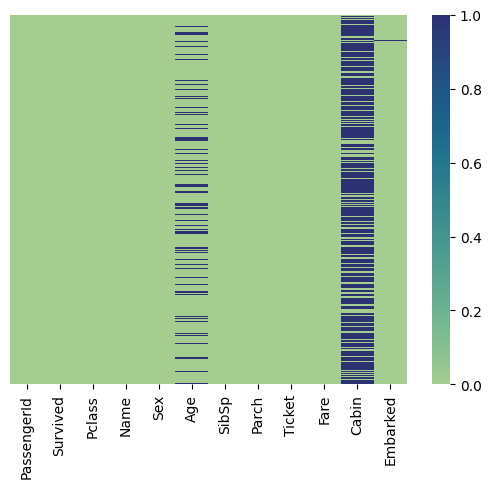

In [6]:
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'crest')

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Here we will check the percentage of nan values present in each feature.
#### Step1: make the list of features which has missing values

In [8]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

#### Step2- print the feature name and the percentage of missing values

In [9]:
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  '% missing values')

Age 0.1987 % missing values
Cabin 0.771 % missing values
Embarked 0.0022 % missing values


#### Age column: 0.1987% missing values

- There are some missing values in the age column, but the percentage of missing values is relatively low (less than 1%).
- One option to handle missing values in this column is to impute them with the mean or median age of the passengers. Another option is to use a predictive model to estimate the missing age values based on other information in the dataset, such as the passenger's title, class of travel, or other demographic information.

#### Cabin column: 0.771% missing values

- The percentage of missing values in the cabin column is relatively high (over 0.5%), which may indicate that this column is not particularly informative for our analysis.
- One option is to drop this column entirely, especially if it does not appear to be strongly correlated with other variables of interest. Alternatively, we could create a new binary variable indicating whether or not a passenger had a cabin assigned, based on whether or not the cabin column contains a missing value.

#### Embarked column: 0.0022% missing values

- The percentage of missing values in the embarked column is very low (less than 0.01%).
- One option to handle the missing values in this column is to impute them with the most common value (i.e., the mode) of the embarked column, since this is a categorical variable. Another option is to use a predictive model to estimate the missing values based on other information in the dataset, such as the passenger's class of travel or fare.

### Let's continue on by visualizing some more of the data!

<AxesSubplot: xlabel='Survived', ylabel='count'>

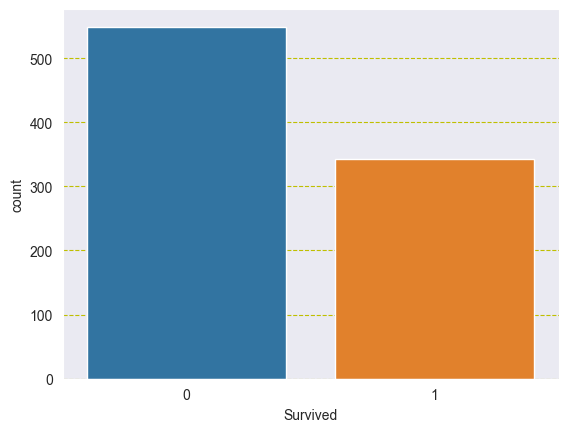

In [10]:
sns.set_style('darkgrid', {"grid.color": "y", "grid.linestyle": "--"})
sns.countplot(x='Survived',data=df)

- 0=Not Survived;
1=Survived

<AxesSubplot: xlabel='Survived', ylabel='count'>

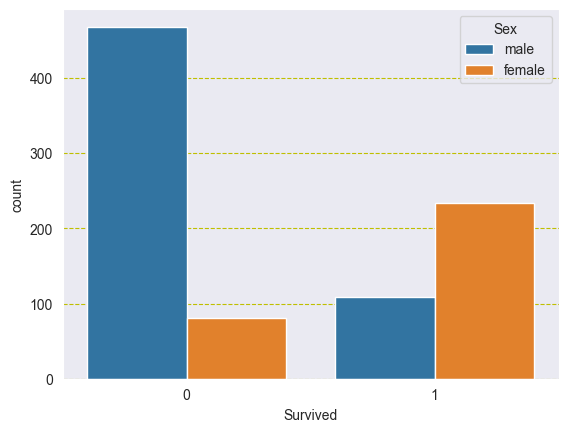

In [11]:
sns.set_style('darkgrid', {"grid.color": "y", "grid.linestyle": "--"})
sns.countplot(x='Survived',data=df,hue="Sex")

- The number of deceased males is significantly higher compared to females.</br>
- And The number of male survived is also lower compared to female.

<AxesSubplot: xlabel='Survived', ylabel='count'>

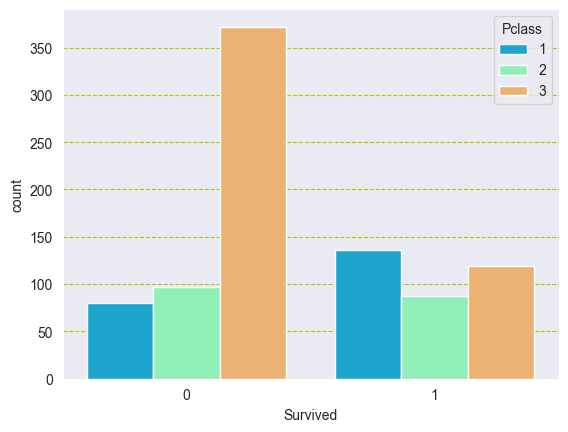

In [12]:
sns.countplot(x='Survived',data=df,hue="Pclass",palette='rainbow')

- A greater number of passengers from the third class category perished.

/Users/anuradhadhanda/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Age'>

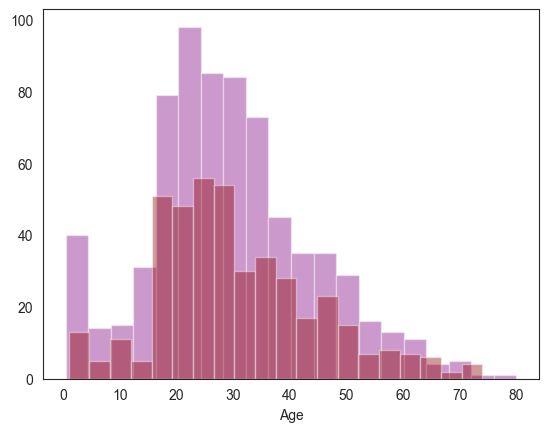

In [13]:
sns.set_style('white')
sns.distplot(df['Age'].dropna(),kde=False,color='purple',bins=20)

# The age distribution of people who died in the Titanic dataset was plotted in a graph.
non_survivors = df[df['Survived'] == 0]

sns.distplot(non_survivors['Age'].dropna(),kde=False,color='darkred',bins=20)

<AxesSubplot: >

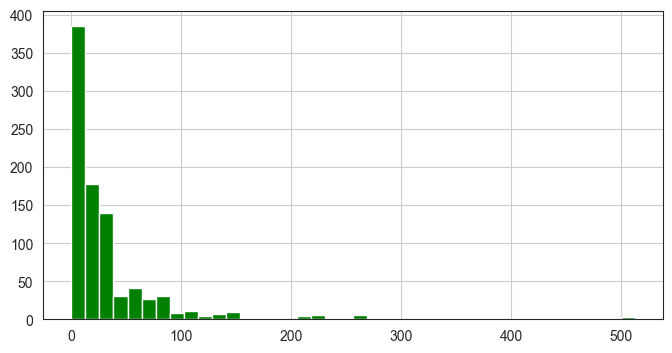

In [14]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [15]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

<AxesSubplot: xlabel='SibSp', ylabel='count'>

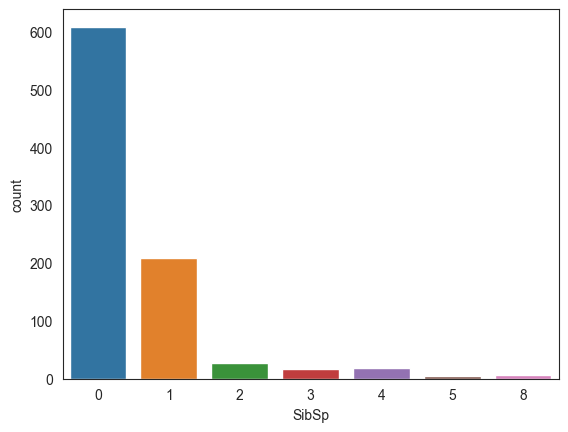

In [16]:
sns.countplot(x='SibSp',data=df)

- Maximum people don't have Sibling and Spouse

## Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows.</br>
One way to do this is by filling in the mean age of all the passengers (imputation).</br>
However we can be smarter about this and check the average age by passenger class.</br>
For example:

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

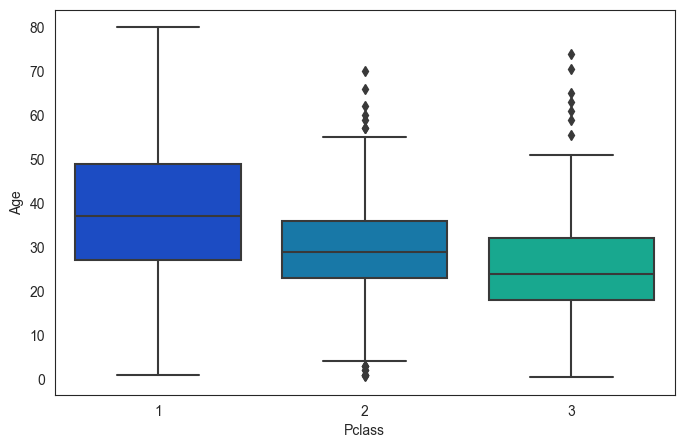

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

Pclass| Avg.Age</br>
   1  |   37</br>
   2  |   29</br>
   3  |   24</br>

#### Let's make a function to compute the age

In [18]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [19]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

#### Let's go ahead and drop the Cabin column and the row in Embarked that have NaN.

In [20]:
df.drop('Cabin',axis=1,inplace=True)

In [21]:
df.dropna(inplace=True)

#### Let's check the heat map again

<AxesSubplot: >

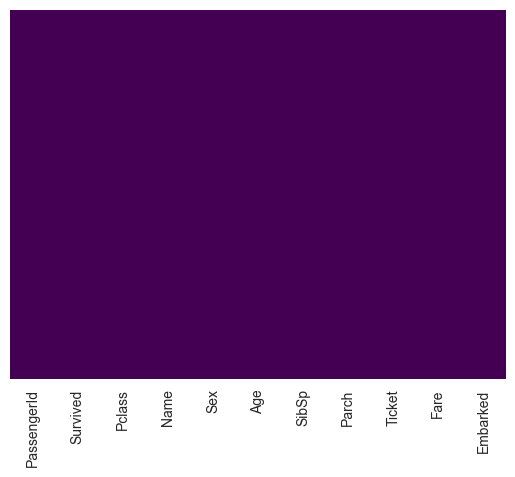

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Converting Categorical Features

#### We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


Columns with object data type:
- Name: Not require will drop later
- Sex: Convert in int using pd.get_dummies
- Ticket: Not require will drop later
- Embarkerd: Convert in int using pd.get_dummies

#### Let's create dummy columns for 'Sex' and 'Emabarked'

In [24]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embark=pd.get_dummies(df['Embarked'],drop_first=True)

#### Let's append the new created columns

In [25]:
df=pd.concat([df,sex,embark],axis=1)

## Droping the Columns  
#### Let's Drop the not required columns 
- Name
- Sex
- Ticket
- Emabarked

In [26]:
df.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [27]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [28]:
corr_matrix = df.corr()

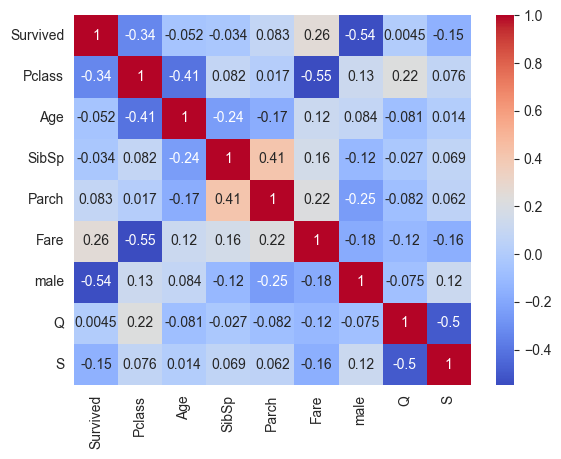

In [29]:
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

### Train-Test Data

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Features and Target variable
X=df.drop('Survived',axis=1)
y=df['Survived']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=42)

# Machine Learning Algorithm

##### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# create a logistic regression model
logreg = LogisticRegression()

# train the model on the training data
logreg.fit(X_train, y_train)

# make predictions on the testing data
y_pred = logreg.predict(X_test)

/Users/anuradhadhanda/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
from sklearn.metrics import classification_report

# Get the classification report
report = classification_report(y_test, y_pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       167
           1       0.72      0.75      0.74       100

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get the precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the scores
print('Precision:', precision)
print('Recall:', recall)
print("F1 score:", f1)
print('Accuracy:', accuracy)

Precision: 0.7211538461538461
Recall: 0.75
F1 score: 0.7352941176470588
Accuracy: 0.797752808988764


##### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Creating the Decision Tree model
dt = DecisionTreeClassifier()

# Training the model
dt.fit(X_train, y_train)

# Making predictions on the test set
y_pred = dt.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n ", conf_matrix)

Confusion matrix: 
  [[135  32]
 [ 30  70]]


In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get the precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the scores
print('Precision:', precision)
print('Recall:', recall)
print("F1 score:", f1)
print('Accuracy:', accuracy)

Precision: 0.6862745098039216
Recall: 0.7
F1 score: 0.693069306930693
Accuracy: 0.7677902621722846


##### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Creating the Random Forest model
rfc = RandomForestClassifier(n_estimators=200)

# train the model on the training data
rfc.fit(X_train, y_train)

# predict on test set
y_pred = rfc.predict(X_test)

In [40]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[142  25]
 [ 34  66]]


In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get the precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the scores
print('Precision:', precision)
print('Recall:', recall)
print("F1 score:", f1)
print('Accuracy:', accuracy)

Precision: 0.7252747252747253
Recall: 0.66
F1 score: 0.6910994764397906
Accuracy: 0.7790262172284644


##### Support Vector Machine

In [42]:
from sklearn.svm import SVC


# Creating the Support Vector machine model
svc = SVC(kernel='linear', C=1, gamma='scale')

# train the model on the training data
svc.fit(X_train, y_train)

# predict on test set
y_pred = svc.predict(X_test)

In [43]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[139  28]
 [ 28  72]]


In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get the precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the scores
print('Precision:', precision)
print('Recall:', recall)
print("F1 score:", f1)
print('Accuracy:', accuracy)

Precision: 0.72
Recall: 0.72
F1 score: 0.72
Accuracy: 0.7902621722846442


##### Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

# Creating the Support Vector machine model
nb = GaussianNB()

# train the model on the training data
nb.fit(X_train, y_train)

# predict on test set
y_pred = nb.predict(X_test)

In [46]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[135  32]
 [ 26  74]]


In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get the precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the scores
print('Precision:', precision)
print('Recall:', recall)
print("F1 score:", f1)
print('Accuracy:', accuracy)

Precision: 0.6981132075471698
Recall: 0.74
F1 score: 0.7184466019417476
Accuracy: 0.7827715355805244


##### K-Nearest Neighbors

In [48]:
from sklearn.neighbors import KNeighborsClassifier

# Creating the K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)

# train the model on the training data
knn.fit(X_train, y_train)

# predict on test set
y_pred = knn.predict(X_test)

/Users/anuradhadhanda/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [49]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[132  35]
 [ 47  53]]


In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get the precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the scores
print('Precision:', precision)
print('Recall:', recall)
print("F1 score:", f1)
print('Accuracy:', accuracy)

Precision: 0.6022727272727273
Recall: 0.53
F1 score: 0.5638297872340425
Accuracy: 0.6928838951310862


## Conclusion:
Based on the precision, recall, F1 score, and accuracy values, it appears that Logistic Regression and Random Forest have performed the best, with identical precision, recall, and F1 score values. The Support Vector Machine and Decision Tree models also performed reasonably well, with slightly lower scores than the top two models. The Naive Bayes model performed moderately well, with identical precision and recall values but a slightly lower F1 score and accuracy. Finally, the K-Nearest Neighbors model had the lowest scores among all models, with the lowest precision, recall, F1 score, and accuracy values.